In [1]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from kmodes.kmodes import KModes
from sklearn.cluster import KMeans

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [93]:
df = pd.read_excel('Data_Business_Case.xlsx').set_index('ID')

df.head()

,Wealth,Income,nFam,Size_municipality,Investment_Risk_Propensity,Pension_Goal,Obiettivo_accumulo_figli,Demographic_WellBeing,Age,Fin_Education,Gender,Employment,Social_risk
ID,,,,,,,,,,,,,
0,0.738527,0.736368,0.0,0.75,0.666667,1,1,0.390902,0.602410,1.00,0,0,0.018719
1,0.764100,0.722982,0.0,0.75,1.000000,1,0,0.357439,0.879518,1.00,1,0,0.050519
2,0.766442,0.751450,0.0,0.50,0.666667,1,0,0.462908,0.771084,0.50,1,0,0.060832
3,0.785476,0.722627,0.0,0.75,1.000000,0,0,0.276345,0.795181,0.50,1,0,0.014991
4,0.700905,0.696817,0.1,0.75,1.000000,1,0,0.390902,0.855422,0.75,0,0,0.018719


We will compute the histogram to try to understand betther the distribution of the samples 

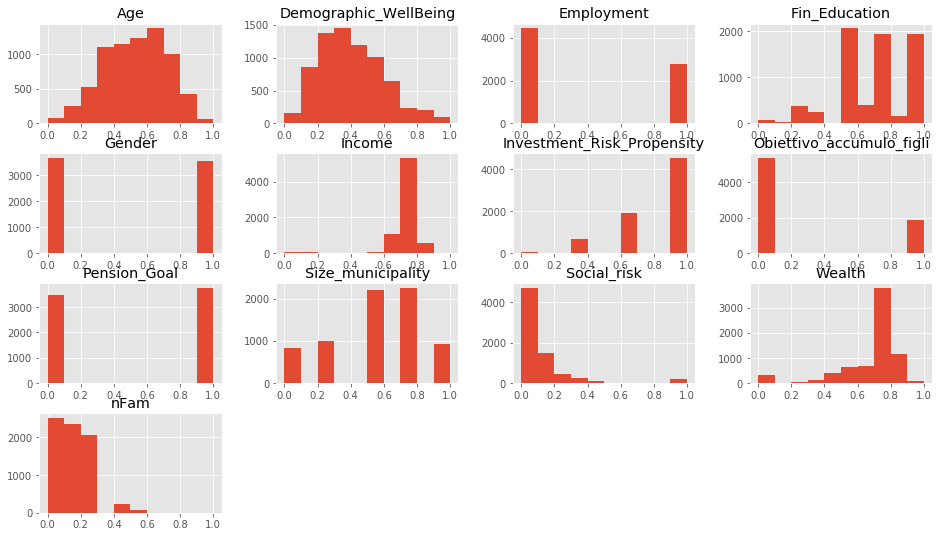

In [6]:

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
df.hist()
plt.show()

In [7]:
#print(df.describe()) 

In [8]:
df.dtypes

Wealth                        float64
Income                        float64
nFam                          float64
Size_municipality             float64
Investment_Risk_Propensity    float64
Pension_Goal                    int64
Obiettivo_accumulo_figli        int64
Demographic_WellBeing         float64
Age                           float64
Fin_Education                 float64
Gender                          int64
Employment                      int64
Social_risk                   float64
dtype: object

Let's try to understand how many different values we have in each atribute

In [9]:
for i in df.columns:
    count = df[i].nunique()
    print(i, ':', count)

Wealth : 4876
Income : 6264
nFam : 10
Size_municipality : 5
Investment_Risk_Propensity : 4
Pension_Goal : 2
Obiettivo_accumulo_figli : 2
Demographic_WellBeing : 53
Age : 82
Fin_Education : 9
Gender : 2
Employment : 2
Social_risk : 53


In [10]:
print('Features:{}'.format([i for i in df.columns]))
print('Number of features: {}'.format(len(df.columns)))

Features:['Wealth', 'Income', 'nFam', 'Size_municipality', 'Investment_Risk_Propensity', 'Pension_Goal', 'Obiettivo_accumulo_figli', 'Demographic_WellBeing', 'Age', 'Fin_Education', 'Gender', 'Employment', 'Social_risk']
Number of features: 13


We will first split the data in Numerical and Categorical data. We will create two data sets.
For the one with Numerial we will use k-means, for the categorical, k-modes.
Then we will join both dataframes and use k-prototypes.

- n — Numerical attributes
- c — Categorical attributes

K-MODES ANALYSIS:
    
    4 ATTRIBUTES: Pension Goal, Objective accomulated, Gender, Employment.
        
            * k-modes [HUANG97] [HUANG98]
            * k-modes with initialization based on density [CAO09]
            * k-prototypes [HUANG97]

In [11]:
n_df = df[['Wealth', 'Income', 'nFam', 'Size_municipality', 'Investment_Risk_Propensity', 'Demographic_WellBeing', 'Age', 'Fin_Education', 'Social_risk']]
c_df = df[['Pension_Goal','Obiettivo_accumulo_figli','Gender','Employment']]

In [12]:
c_df.head() 

,Pension_Goal,Obiettivo_accumulo_figli,Gender,Employment
ID,,,,
0,1,1,0,0
1,1,0,1,0
2,1,0,1,0
3,0,0,1,0
4,1,0,0,0


In the case of categorical features we just have 4 attributes. Therefore, we can apply k-modes directly.

Documentation: https://pypi.org/project/kmodes/ 

In [13]:
#pip install kmodes
#pip install --upgrade kmodes

To select the right number of clusters we will have to plot the cost function against the number of clusters. Where we identify the elbow we will use the number as the cluster nuber. 

In [14]:
# random categorical data
clusters = range(1,10)


def meth_Huang(samples,itera,verb):
    costs = []
    
    for k in clusters:
        km = KModes(n_clusters=k, init='Huang', n_init=itera, verbose=verb)
        #verbose just dictates how much output gets passed to stdout (i.e. telling you what stage the algorithm is at etc).
        km.fit(samples)
        costs.append(km.cost_)#Clustering cost, defined as the sum distance of all points to their respective cluster centroids.
       
    return costs
find_n_clusters = meth_Huang(c_df, 30, 0 )


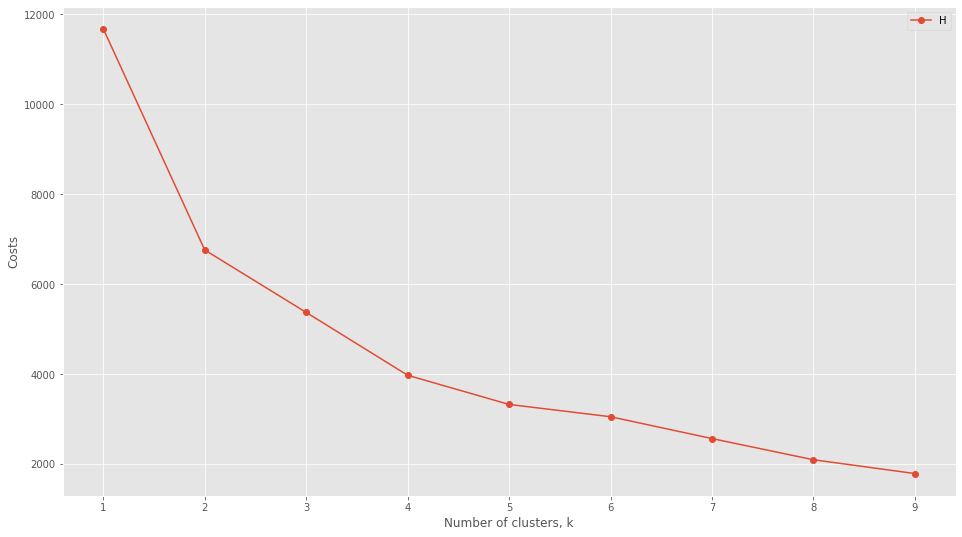

In [15]:

plt.plot(clusters, find_n_clusters, '-o')

plt.legend(('Huang method'),
           loc='upper right')
plt.xlabel('Number of clusters, k')
plt.ylabel('Costs')
plt.xticks(clusters)
plt.show()

We can see that the elbow is found when we have 3 clusters. We will proceed with this number. 


In [16]:
km = KModes(n_clusters = 3, init = 'Huang', n_init = 30, verbose = 1)

clusters_kmodes = km.fit_predict(c_df)
print('Centroids: {}'.format(km.cluster_centroids_))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 867, cost: 6631.0
Run 1, iteration: 2/100, moves: 0, cost: 6631.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1193, cost: 6738.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 6257.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 6257.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2075, cost: 5910.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 814, cost: 6345.0
Run 6, iteration: 2/100, moves: 460, cost: 6345.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 1193, cost: 

In [17]:
'''Parameters
    -----------
    n_clusters : int, optional, default: 8
        The number of clusters to form as well as the number of
        centroids to generate.
    max_iter : int, default: 300
        Maximum number of iterations of the k-modes algorithm for a
        single run.
    cat_dissim : func, default: matching_dissim
        Dissimilarity function used by the algorithm for categorical variables.
        Defaults to the matching dissimilarity function.
    init : {'Huang', 'Cao', 'random' or an ndarray}, default: 'Cao'
        Method for initialization:
        'Huang': Method in Huang [1997, 1998]
        'Cao': Method in Cao et al. [2009]
        'random': choose 'n_clusters' observations (rows) at random from
        data for the initial centroids.
        If an ndarray is passed, it should be of shape (n_clusters, n_features)
        and gives the initial centroids.
    n_init : int, default: 10
        Number of time the k-modes algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of cost.
    verbose : int, optional
        Verbosity mode.
        Attributes
    ----------
    cluster_centroids_ : array, [n_clusters, n_features]
        Categories of cluster centroids
    labels_ :
        Labels of each point
    cost_ : float
        Clustering cost, defined as the sum distance of all points to
        their respective cluster centroids.
    n_iter_ : int
        The number of iterations the algorithm ran for.
'''

"Parameters\n    -----------\n    n_clusters : int, optional, default: 8\n        The number of clusters to form as well as the number of\n        centroids to generate.\n    max_iter : int, default: 300\n        Maximum number of iterations of the k-modes algorithm for a\n        single run.\n    cat_dissim : func, default: matching_dissim\n        Dissimilarity function used by the algorithm for categorical variables.\n        Defaults to the matching dissimilarity function.\n    init : {'Huang', 'Cao', 'random' or an ndarray}, default: 'Cao'\n        Method for initialization:\n        'Huang': Method in Huang [1997, 1998]\n        'Cao': Method in Cao et al. [2009]\n        'random': choose 'n_clusters' observations (rows) at random from\n        data for the initial centroids.\n        If an ndarray is passed, it should be of shape (n_clusters, n_features)\n        and gives the initial centroids.\n    n_init : int, default: 10\n        Number of time the k-modes algorithm will be

Let's see how many samples do we have in each cluster. 

In [18]:
labels = km.labels_
c_df['KMODES_Labels'] = labels
c_df.head(5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pension_Goal,Obiettivo_accumulo_figli,Gender,Employment,KMODES_Labels
ID,,,,,
0,1,1,0,0,2
1,1,0,1,0,1
2,1,0,1,0,1
3,0,0,1,0,1
4,1,0,0,0,2


Now we are interested in filtering the DataFrame in terms of a defined condition: The lebels of the clusters

In [19]:
label_0 = c_df[c_df['KMODES_Labels']== 0]
label_1 = c_df[c_df['KMODES_Labels']== 1]
label_2 = c_df[c_df['KMODES_Labels']== 2]

In [20]:
print('Total length is: {}'.format(len(c_df)))
print('Length label 0: {};    label 1: {};    label 2: {}'.format(len(label_0),len(label_1),len(label_2)))

Total length is: 7216
Length label 0: 3135;    label 1: 2905;    label 2: 1176


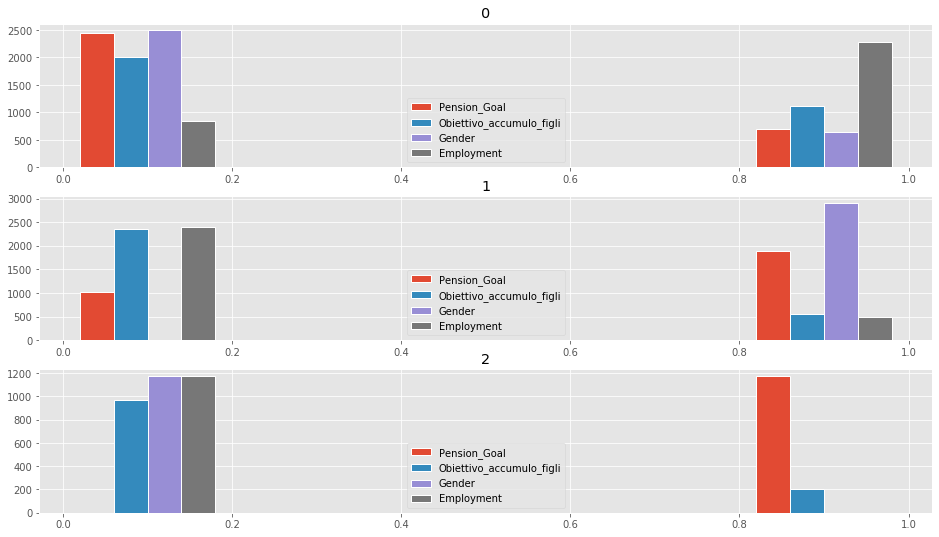

In [21]:

x = c_df

group_col = 'KMODES_Labels'
groups = ['Pension_Goal','Obiettivo_accumulo_figli','Gender','Employment']


g = x.groupby(group_col)
num_groups = g.ngroups

fig, axes = plt.subplots(num_groups)
for i, (k, group) in enumerate(g):
    ax = axes[i]
    ax.set_title(k)
    group = group[[c for c in group.columns if c != group_col]]
    num_columns = len(group.columns)
    
    ax.hist(group.values, 5, histtype='bar',
            label=list(group.columns), 
            linewidth=1, edgecolor='white')
    ax.legend()

plt.show()

Lets now see an analysis just using the numerical data with kmeans.
After the analysis we will compate the new columns for the kmodes and kmeans clusters to llok for similarities.

For k-means we will use this documentation: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 

In [22]:
n_df

,Wealth,Income,nFam,Size_municipality,Investment_Risk_Propensity,Demographic_WellBeing,Age,Fin_Education,Social_risk
ID,,,,,,,,,
0,0.738527,0.736368,0.0,0.75,0.666667,0.390902,0.602410,1.00,0.018719
1,0.764100,0.722982,0.0,0.75,1.000000,0.357439,0.879518,1.00,0.050519
2,0.766442,0.751450,0.0,0.50,0.666667,0.462908,0.771084,0.50,0.060832
3,0.785476,0.722627,0.0,0.75,1.000000,0.276345,0.795181,0.50,0.014991
4,0.700905,0.696817,0.1,0.75,1.000000,0.390902,0.855422,0.75,0.018719
...,...,...,...,...,...,...,...,...,...
7211,0.418975,0.635711,0.2,0.75,1.000000,0.151797,0.385542,0.50,0.002093
7212,0.615110,0.743242,0.0,0.75,1.000000,0.328822,0.542169,1.00,0.075600
7213,0.000000,0.715335,0.1,0.00,1.000000,0.285458,0.445783,0.50,0.057891


In [23]:
# random categorical data
clusters = range(1,10)


def meth_kmeans(samples,itera):
    inertia = []
    
    for k in clusters:

        km = KMeans(n_clusters = k, n_init = itera, init ='k-means++')# we could also used 'random' as init method
        #verbose just dictates how much output gets passed to stdout (i.e. telling you what stage the algorithm is at etc).
        km.fit_predict(samples)
        inertia.append(km.inertia_)
               #inertia_float== Sum of squared distances of samples to their closest cluster center.
    return inertia
kmeans_n_clusters = meth_kmeans(n_df, 80 )


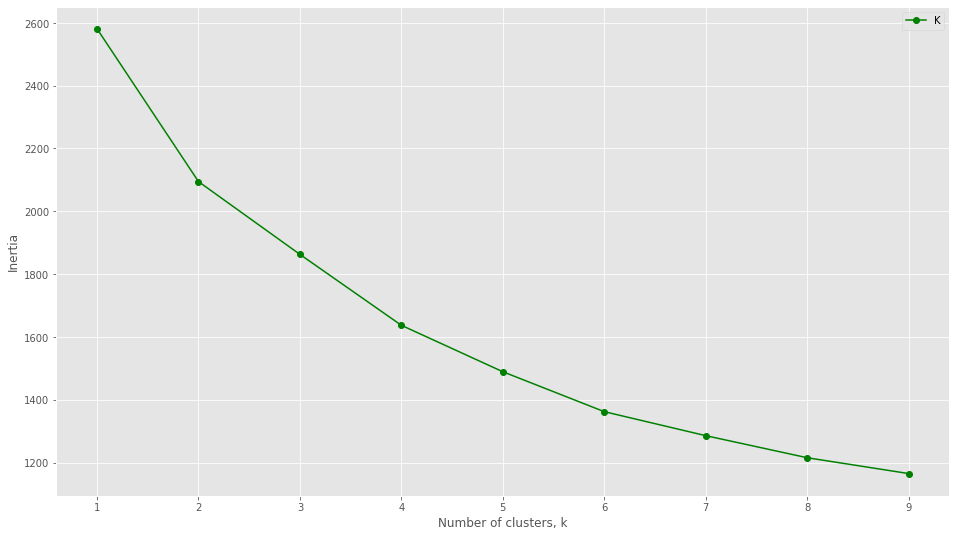

In [24]:
plt.plot(clusters, kmeans_n_clusters, 'g-o')

plt.legend(('Kmeans'),
           loc='upper right')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(clusters)
plt.show()

We select number of clusters = 4, based on the elbow method

In [25]:
k_means = KMeans(n_clusters = 4, n_init = 30, init ='k-means++')


In [26]:
'''Parameters
        n_clustersint, default=8
        The number of clusters to form as well as the number of centroids to generate.

        init{‘k-means++’, ‘random’} or ndarray of shape (n_clusters, n_features), default=’k-means++’
        Method for initialization, defaults to ‘k-means++’:

        ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

        ‘random’: choose k observations (rows) at random from data for the initial centroids.

        If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

        n_initint, default=10
        Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

        max_iterint, default=300
        Maximum number of iterations of the k-means algorithm for a single run.

        tolfloat, default=1e-4
        Relative tolerance with regards to inertia to declare convergence.

        precompute_distances‘auto’ or bool, default=’auto’
        Precompute distances (faster but takes more memory).

        ‘auto’ : do not precompute distances if n_samples * n_clusters > 12 million. This corresponds to about 100MB overhead per job using double precision.

        True : always precompute distances.

        False : never precompute distances.

        verboseint, default=0
        Verbosity mode.

        random_stateint, RandomState instance, default=None
        Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See Glossary.

        copy_xbool, default=True
        When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True (default), then the original data is not modified, ensuring X is C-contiguous. If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean, in this case it will also not ensure that data is C-contiguous which may cause a significant slowdown.

        n_jobsint, default=None
        The number of jobs to use for the computation. This works by computing each of the n_init runs in parallel.

        None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

        algorithm{“auto”, “full”, “elkan”}, default=”auto”
        K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient by using the triangle inequality, but currently doesn’t support sparse data. “auto” chooses “elkan” for dense data and “full” for sparse data.
-------------------
Attributes
        cluster_centers_ndarray of shape (n_clusters, n_features)
        Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.

        labels_ndarray of shape (n_samples,)
        Labels of each point

        inertia_float
        Sum of squared distances of samples to their closest cluster center.

        n_iter_int
        Number of iterations run.'''

'Parameters\n        n_clustersint, default=8\n        The number of clusters to form as well as the number of centroids to generate.\n\n        init{‘k-means++’, ‘random’} or ndarray of shape (n_clusters, n_features), default=’k-means++’\n        Method for initialization, defaults to ‘k-means++’:\n\n        ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.\n\n        ‘random’: choose k observations (rows) at random from data for the initial centroids.\n\n        If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.\n\n        n_initint, default=10\n        Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.\n\n        max_iterint, default=300\n        Maximum number of iterations of the k-means algorithm for a single 

In [27]:
clusters_kmeans = k_means.fit_predict(n_df)
print('Centroids: {}'.format(k_means.cluster_centers_))

Centroids: [[0.66228761 0.72554985 0.11045262 0.65874308 0.99967437 0.38090224
  0.55079582 0.68401986 0.08720238]
 [0.6927915  0.72813275 0.11929412 0.13058824 0.90196078 0.32056226
  0.55347271 0.68544118 0.05119849]
 [0.68063914 0.75511483 0.11059432 1.         0.84065461 0.8613784
  0.51365151 0.67086563 0.68882773]
 [0.70216691 0.73520566 0.1340622  0.6558552  0.5447036  0.40582723
  0.48565691 0.71531827 0.09456054]]


In [28]:
labels_kmeans = k_means.labels_
n_df['KMEANS_Labels'] = labels_kmeans
n_df.head(5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Wealth,Income,nFam,Size_municipality,Investment_Risk_Propensity,Demographic_WellBeing,Age,Fin_Education,Social_risk,KMEANS_Labels
ID,,,,,,,,,,
0,0.738527,0.736368,0.0,0.75,0.666667,0.390902,0.602410,1.00,0.018719,3
1,0.764100,0.722982,0.0,0.75,1.000000,0.357439,0.879518,1.00,0.050519,0
2,0.766442,0.751450,0.0,0.50,0.666667,0.462908,0.771084,0.50,0.060832,3
3,0.785476,0.722627,0.0,0.75,1.000000,0.276345,0.795181,0.50,0.014991,0
4,0.700905,0.696817,0.1,0.75,1.000000,0.390902,0.855422,0.75,0.018719,0


In [29]:
kmeans_labels = n_df.groupby('KMEANS_Labels').size()
kmeans_labels

KMEANS_Labels
0    3071
1    1700
2     387
3    2058
dtype: int64

Text(0.5, 0.92, 'K Means Analysis')

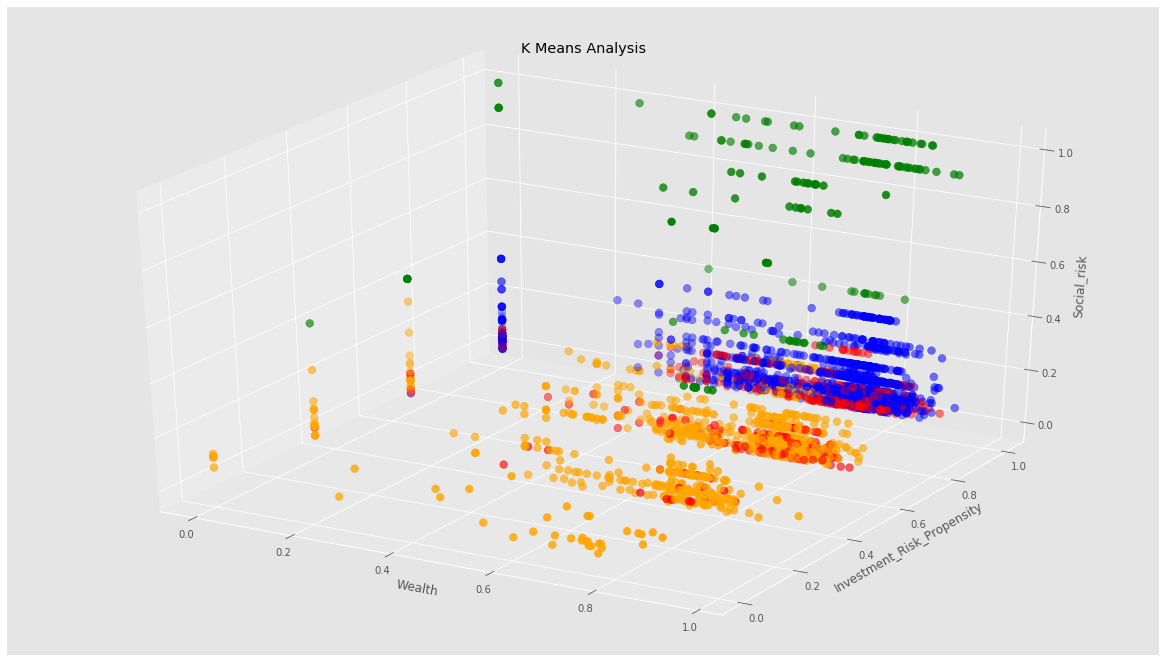

In [30]:
y = n_df["KMEANS_Labels"][4000:]

X = np.array(n_df[['Wealth', 'Investment_Risk_Propensity', 'Social_risk']][4000:])#'Employment'
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','orange']
asignar=[]
for row in y:
  
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.set_xlabel('Wealth')
ax.set_ylabel('Investment_Risk_Propensity')
ax.set_zlabel('Social_risk')
ax.set_title('K Means Analysis')

Lets now use PCA to reduce the dimensionality and plot the result in a lower dimension space.
Documentation: https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

First we need to find the optimal number of components which capture the greatest amount of variance in teh data. 

To better create plots: https://chart-studio.plotly.com/create/?fid=dimakav:22#/ 

Finnaly we will look to an analysis using both numerical and categorical data using k-prototypes.

Documentation: https://github.com/nicodv/kmodes/blob/master/kmodes/tests/test_kprototypes.py 

https://github.com/aniket1992/High-Profile-Doctor-Segmentation/blob/master/notebook/High%20Value%20Doctors%20Segmentation.ipynb

In [31]:
from sklearn import preprocessing

Let's try to understand how many different values we have in each atribute

Since we have a combination of categorical and numerical features the best clustering algorithm that we can aplly is K-Prototype.

### Dimensionality Reduction using PCA ONLY for NUMERICAL features

Visualize the data, to do so we need 2 or 3 dimensions. We have to reduce the dimensionality

In [32]:
#pip install prince

In [33]:
#pip install git+https://github.com/MaxHalford/Prince

In [34]:
import prince 
#this package is used for 'factor analysis' for mixed data
'''Prince is a library for doing factor analysis. This includes a variety of methods including principal component analysis (PCA) 
prince uses pandas to manipulate dataframes, then, it expects an initial dataframe to work with.

Prince decomposes the dataframe into 2 eigenvector matrices and one eigenvalue array .
The eigenvectors can then be used to project the initial dataset onto lower dimensions.'''


'Prince is a library for doing factor analysis. This includes a variety of methods including principal component analysis (PCA) \nprince uses pandas to manipulate dataframes, then, it expects an initial dataframe to work with.\n\nPrince decomposes the dataframe into 2 eigenvector matrices and one eigenvalue array .\nThe eigenvectors can then be used to project the initial dataset onto lower dimensions.'

In [35]:
data = n_df.drop(columns = ['KMEANS_Labels'])
data.describe()


,Wealth,Income,nFam,Size_municipality,Investment_Risk_Propensity,Demographic_WellBeing,Age,Fin_Education,Social_risk
count,7216.000000,7216.000000,7216.000000,7216.000000,7216.000000,7216.000000,7216.000000,7216.000000,7216.000000
mean,0.681832,0.730498,0.119277,0.551795,0.838368,0.399564,0.530857,0.692576,0.113085
std,0.186845,0.098965,0.119984,0.293574,0.234551,0.189614,0.188722,0.240256,0.167768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.656041,0.715909,0.000000,0.250000,0.666667,0.275233,0.397590,0.500000,0.030202
50%,0.745920,0.747346,0.100000,0.500000,1.000000,0.367110,0.542169,0.750000,0.060832
75%,0.783157,0.771978,0.200000,0.750000,1.000000,0.519681,0.674699,1.000000,0.115896
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


([<matplotlib.axis.XTick at 0x1201c4750>,
 <a list of 6 Text xticklabel objects>)

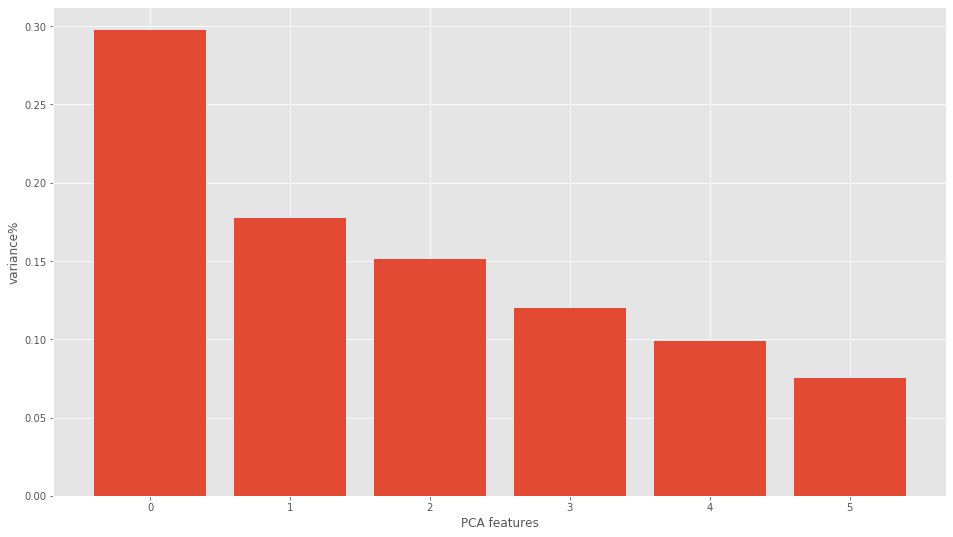

In [39]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

pca = PCA( n_components =6)
principalComponents = pca.fit_transform(data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance%')
plt.xticks(features)

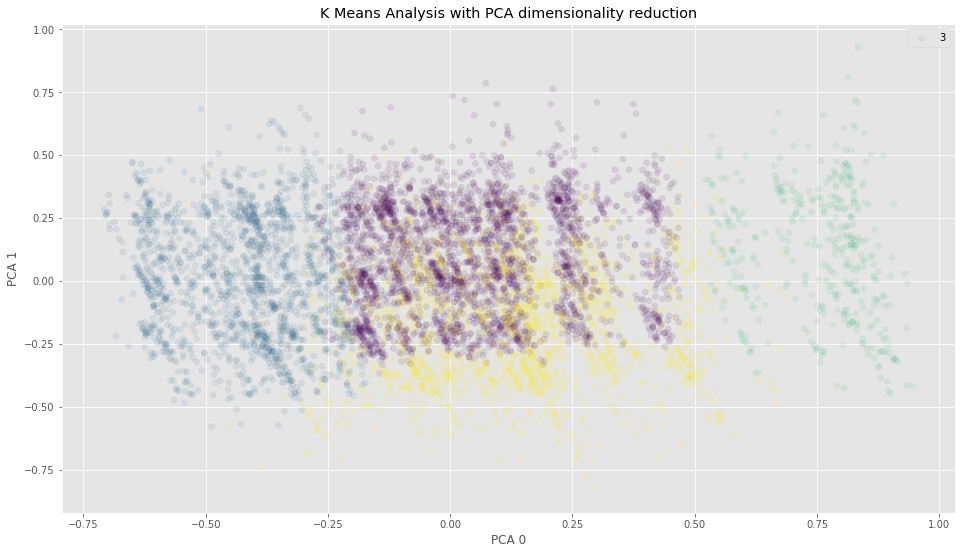

In [40]:
PCA_components = pd.DataFrame(principalComponents)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, c= n_df['KMEANS_Labels'])
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
plt.title('K Means Analysis with PCA dimensionality reduction')
plt.legend(n_df['KMEANS_Labels'])

Text(0.5, 0.92, 'K Means Analysis with PCA dimensionality reduction')

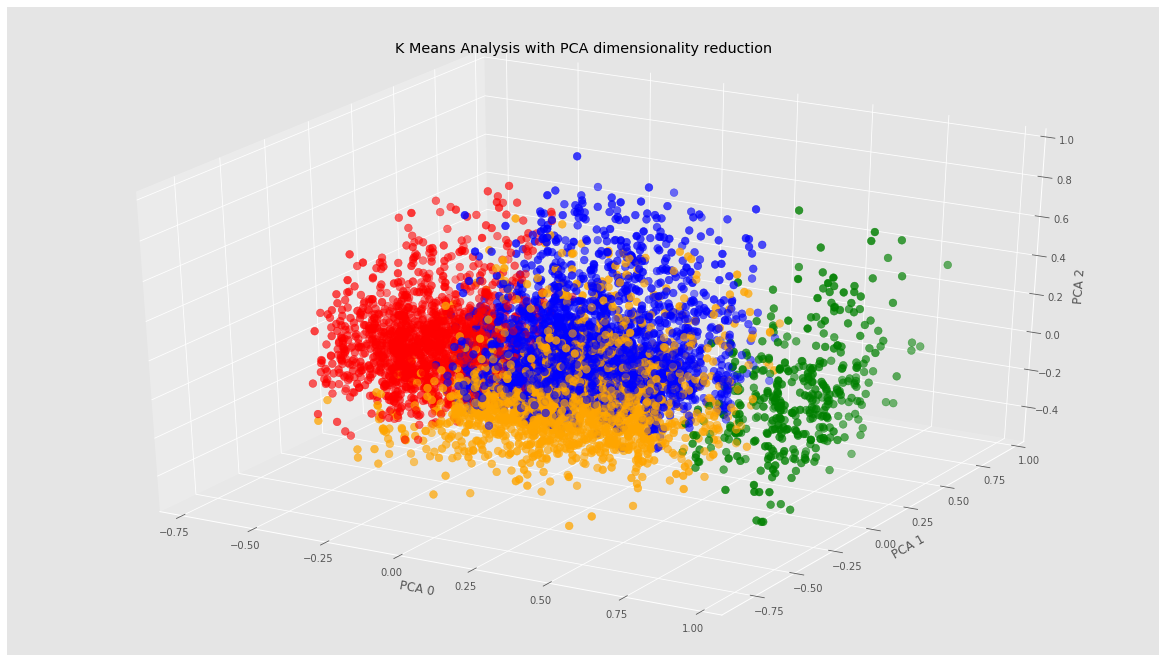

In [41]:
y = n_df["KMEANS_Labels"]

X = np.array([PCA_components[0],PCA_components[1],PCA_components[3]])#'Employment'
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','orange']
asignar=[]
for row in y:
  
    asignar.append(colores[row])
ax.scatter(X[0], X[1], X[2], c=asignar,s=60)
ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 2')
ax.set_title('K Means Analysis with PCA dimensionality reduction')

### SIMPLEST DATA ANALYSIS, no AI or ML tools

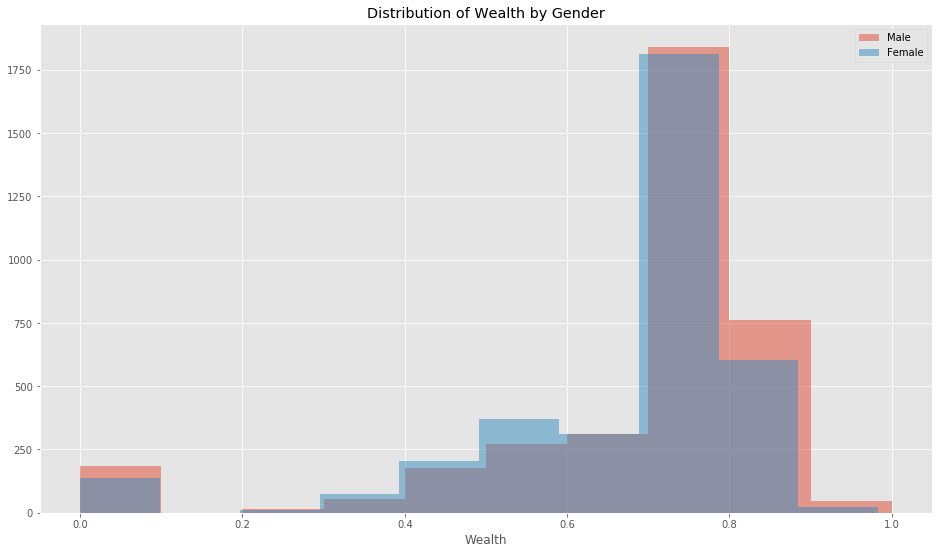

In [42]:
plt.hist('Wealth', data=df[df['Gender']==0], alpha=0.5, label='Male')

plt.hist('Wealth', data=df[df['Gender']==1], alpha=0.5, label='Female')

plt.title('Distribution of Wealth by Gender')

plt.xlabel('Wealth')

plt.legend()

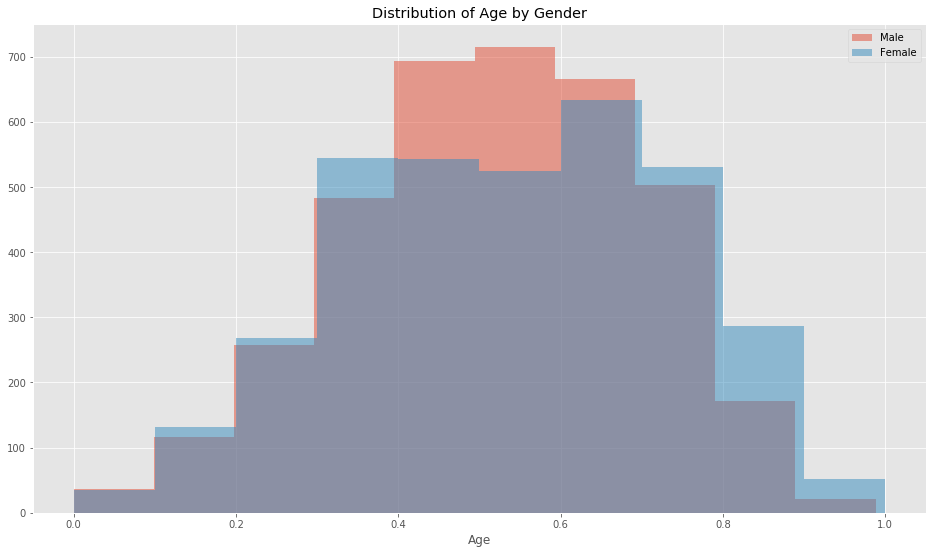

In [43]:
plt.hist('Age', data=df[df['Gender']==0], alpha=0.5, label='Male')

plt.hist('Age', data=df[df['Gender']==1], alpha=0.5, label='Female')

plt.title('Distribution of Age by Gender')

plt.xlabel('Age')

plt.legend()

Text(0.5, 1.0, 'Age to Wealth, colored by Gender')

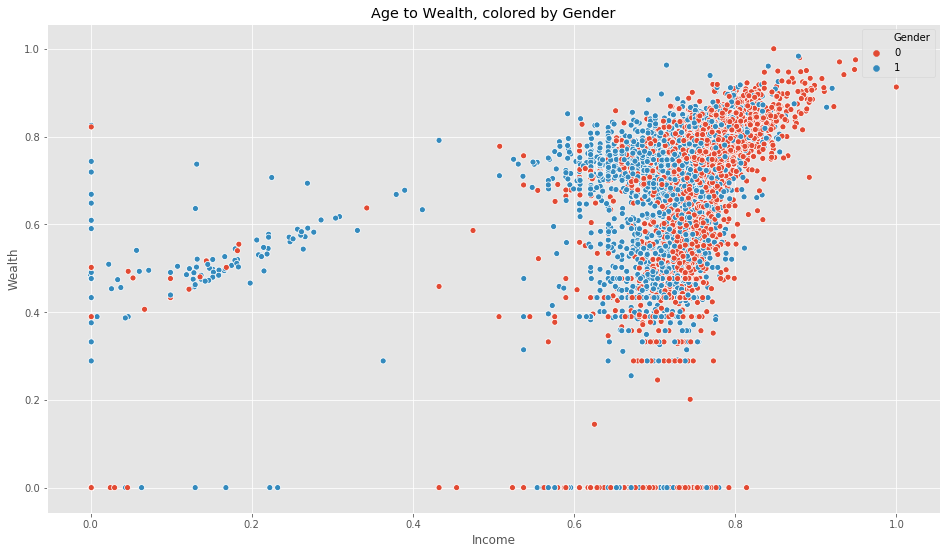

In [44]:
male = df[df['Gender'] == 0]
female = df[df['Gender'] == 1]

sb.scatterplot('Income', 'Wealth', hue = 'Gender', data=df)
plt.title('Age to Wealth, colored by Gender')

Lets look for correlations in data

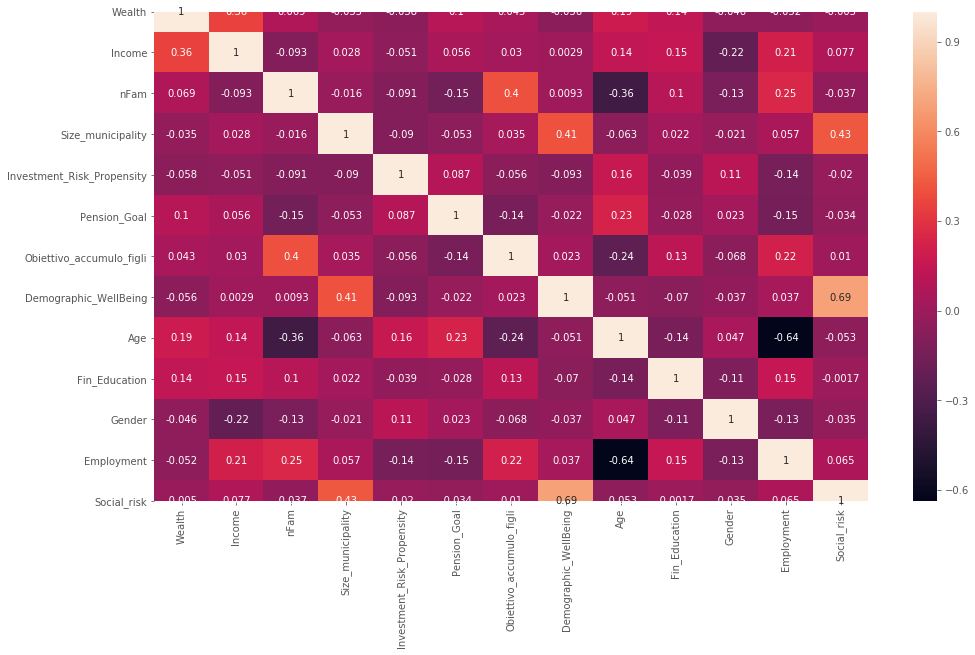

In [53]:

dataframe = df.drop(columns =['KPROTOTYPES'])
sb.heatmap(dataframe.corr(), annot=True)

Same but separating by gender

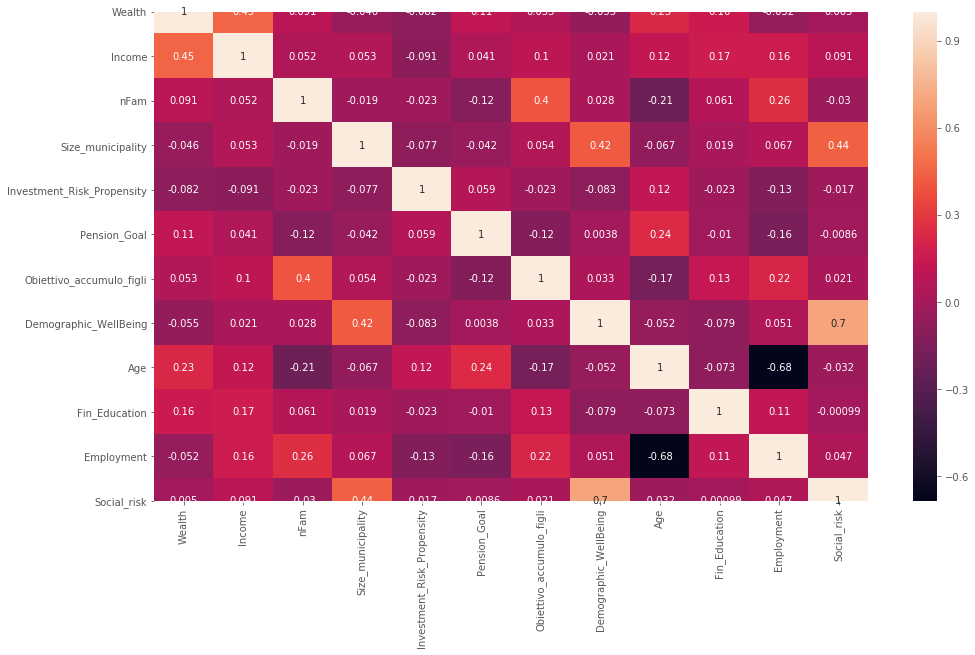

In [48]:

dataframe_male = male.drop(columns =['Gender'])
sb.heatmap(dataframe_male.corr(), annot=True)

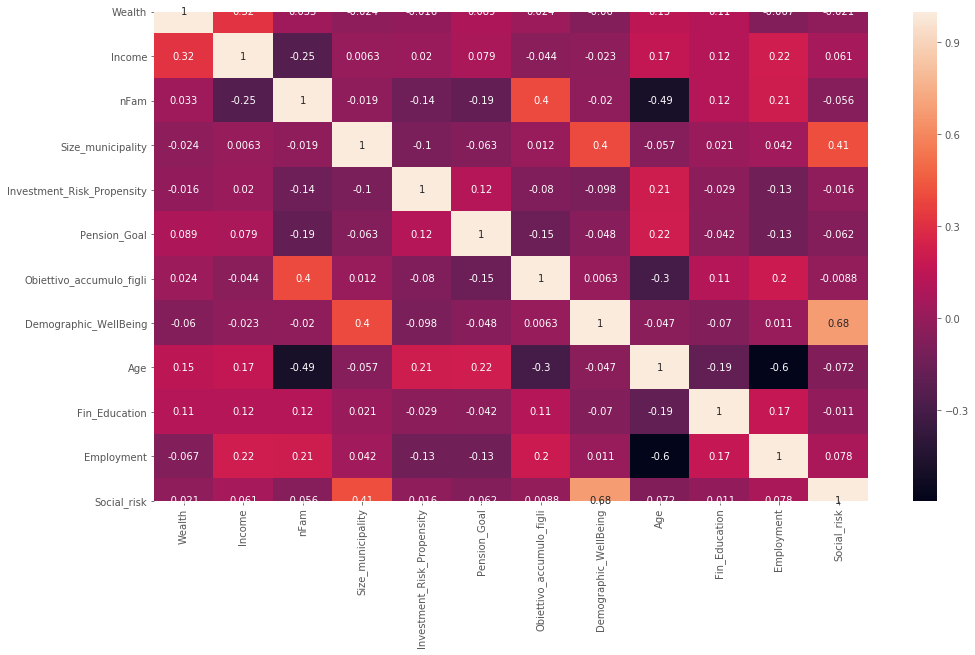

In [49]:

dataframe_female = female.drop(columns =['Gender'])
sb.heatmap(dataframe_female.corr(), annot=True)

### Analysis with all featues -> k-prototypes

In [50]:
for i in df.columns:
    count = df[i].nunique()
    print(i, ':', count)

Wealth : 4876
Income : 6264
nFam : 10
Size_municipality : 5
Investment_Risk_Propensity : 4
Pension_Goal : 2
Obiettivo_accumulo_figli : 2
Demographic_WellBeing : 53
Age : 82
Fin_Education : 9
Gender : 2
Employment : 2
Social_risk : 53


Since we have a combination of categorical and numerical features the best clustering algorithm that we can aplly is K-Prototype.

In [51]:
from kmodes.kprototypes import KPrototypes
from matplotlib import style
style.use('ggplot')

kp = KPrototypes(n_clusters = 3, init = 'Cao', n_init = 10)
kp_clustering = kp.fit_predict(df, categorical = [5,6,10,11])
#the categorical parameter specifies the categorical features

In [52]:
df['KPROTOTYPES'] = kp.labels_
df.groupby(['KPROTOTYPES']).size()

KPROTOTYPES
0    2825
1    1938
2    2453
dtype: int64

Representation of the results using k-prototypes

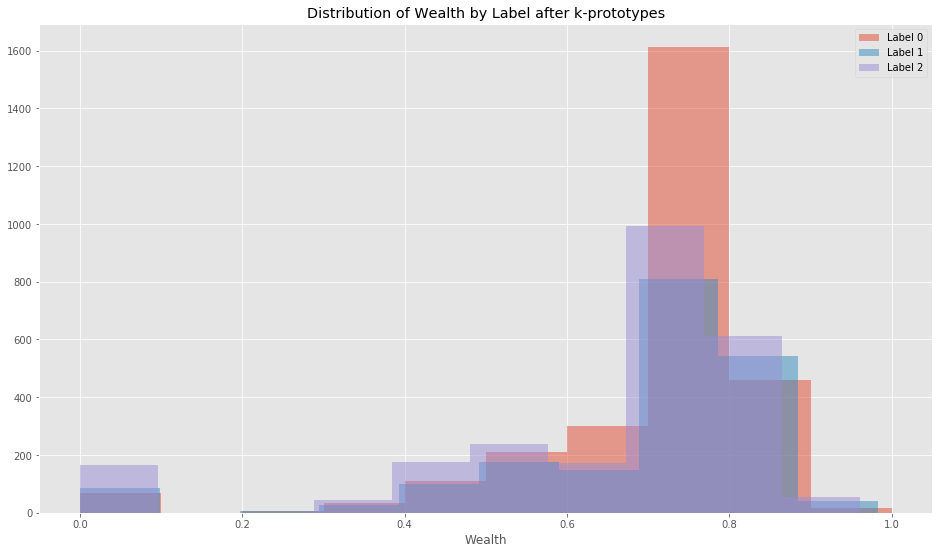

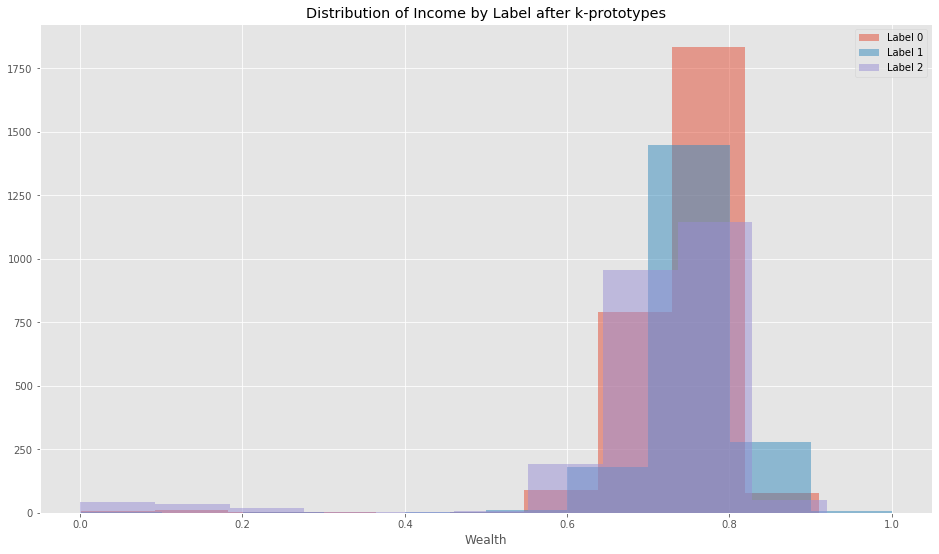

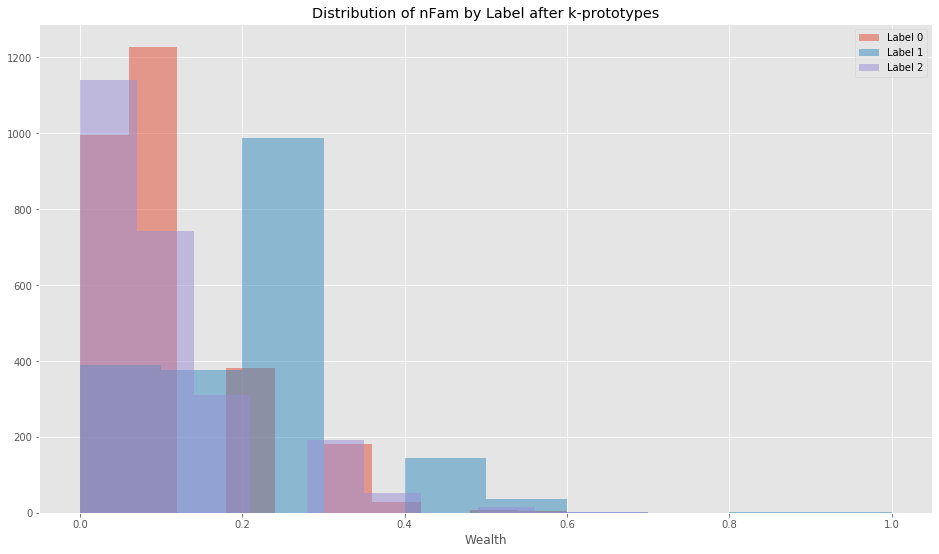

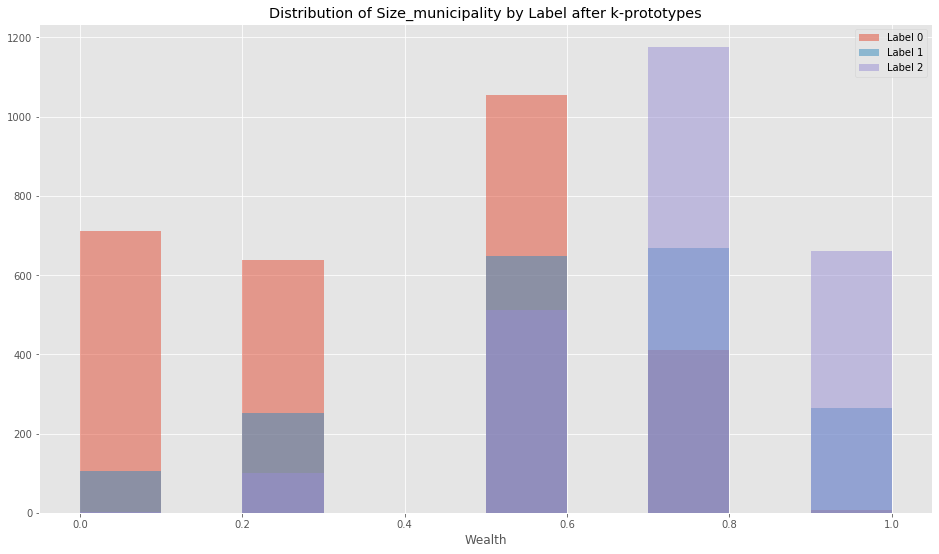

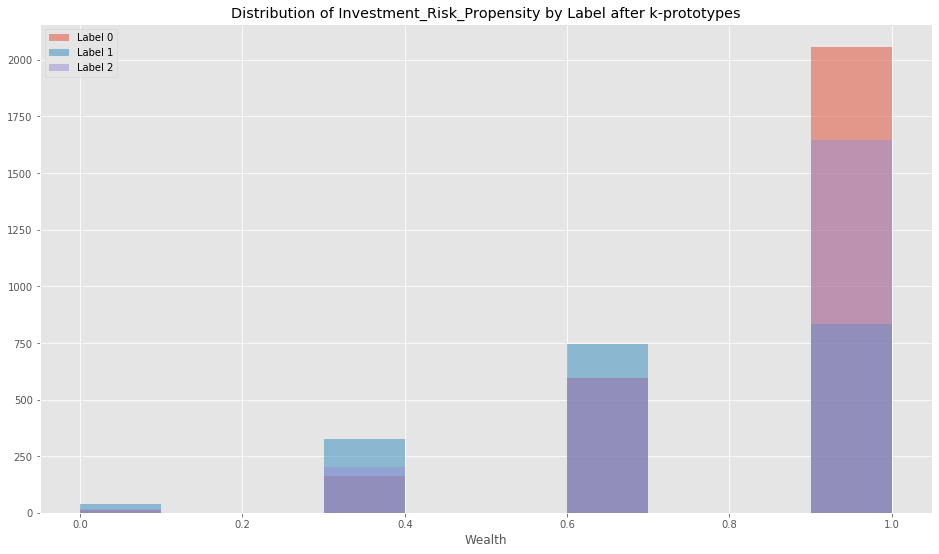

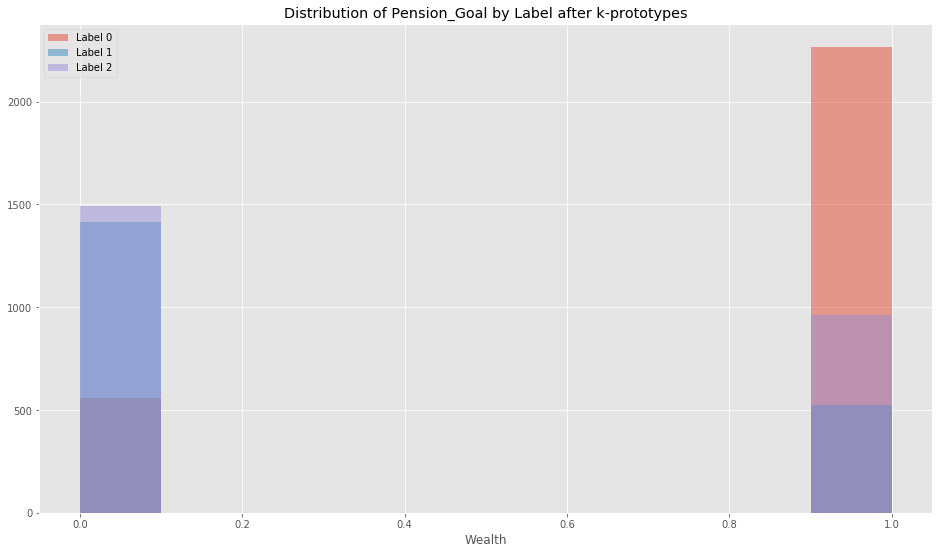

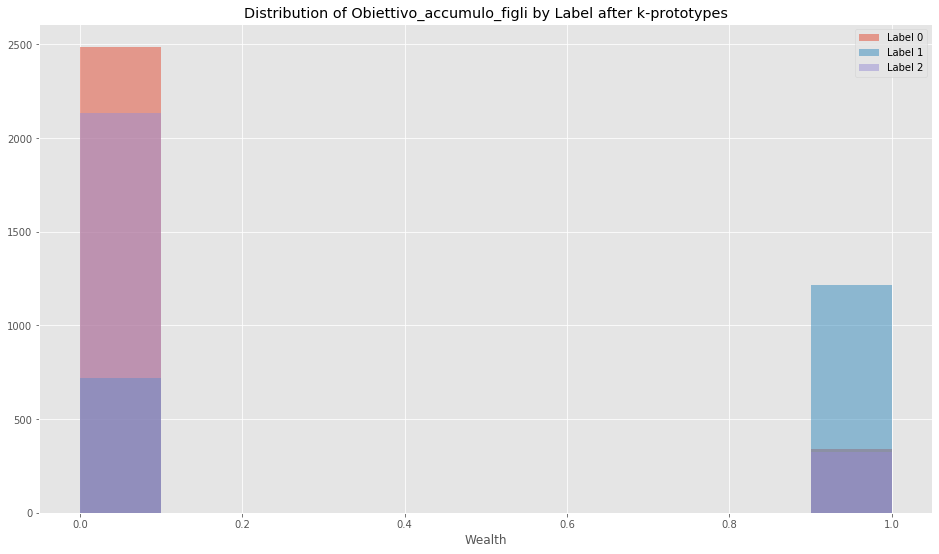

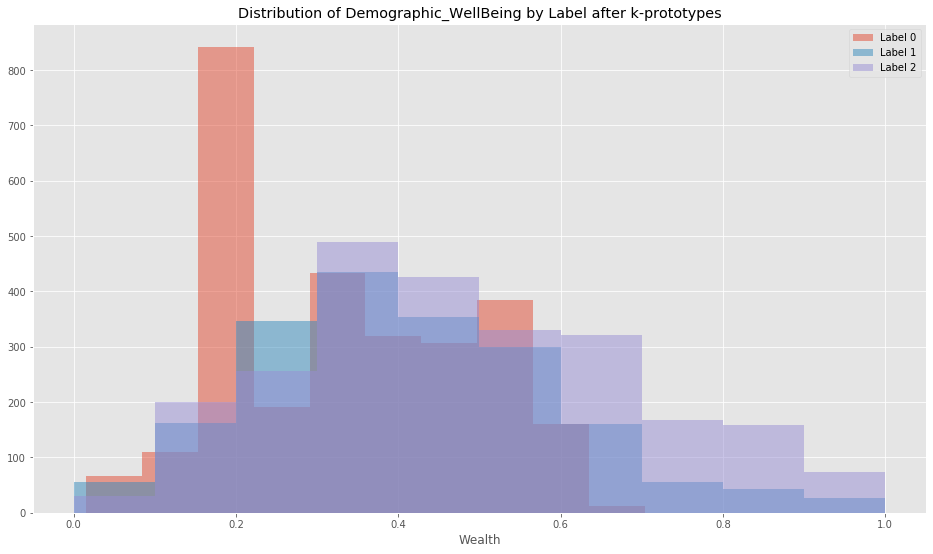

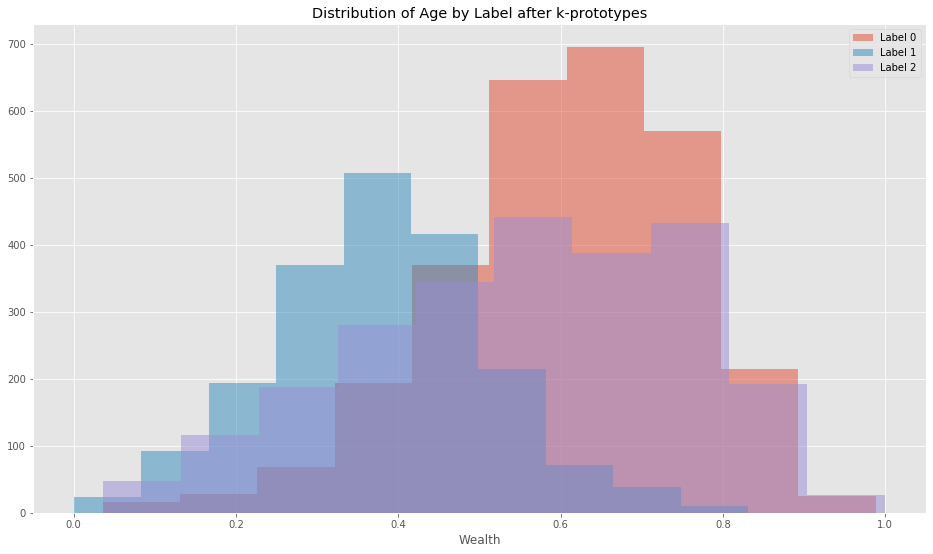

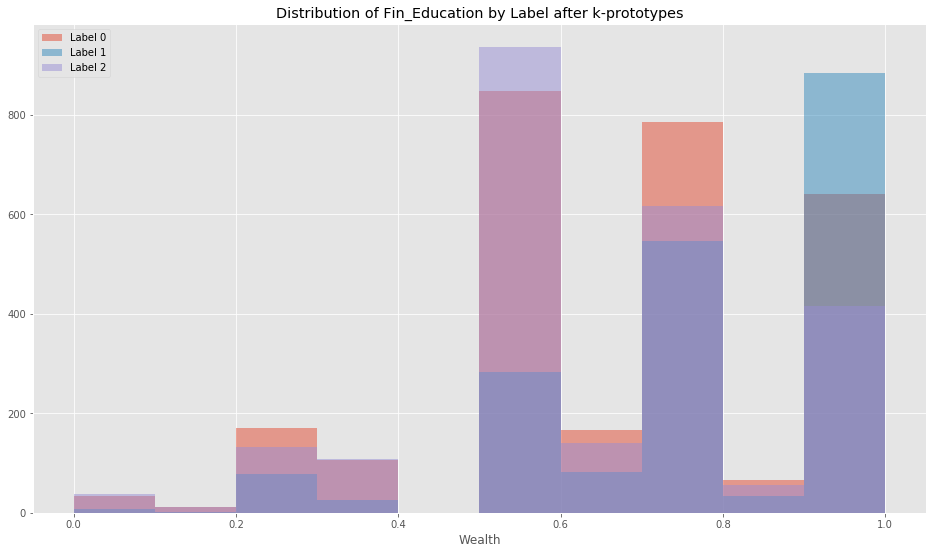

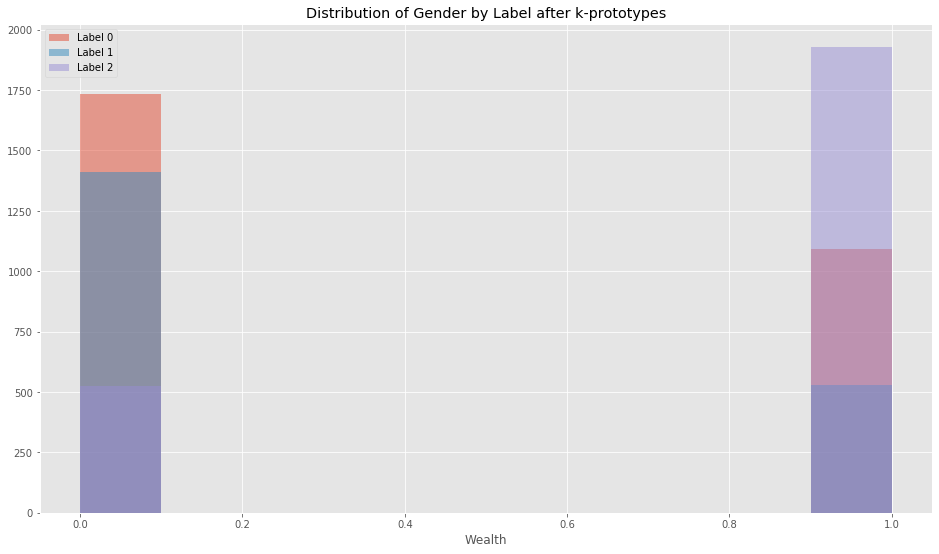

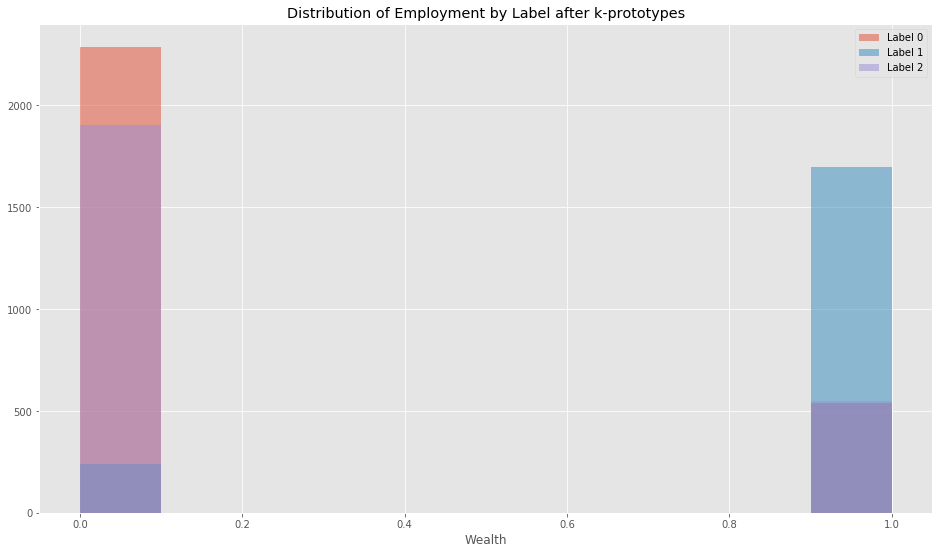

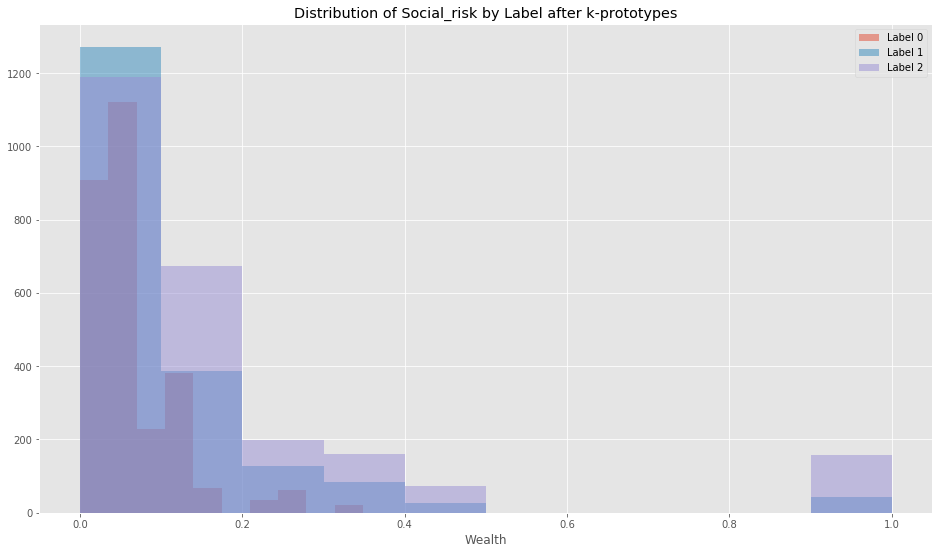

In [54]:

for k in df.columns: 
    if k != 'KPROTOTYPES':
      
        plt.figure()

        plt.hist(k, data=df[df['KPROTOTYPES'] == 0], alpha=0.5, label='Label 0')
        plt.hist(k, data=df[df['KPROTOTYPES'] == 1], alpha=0.5, label='Label 1')
        plt.hist(k, data=df[df['KPROTOTYPES'] == 2], alpha=0.5, label='Label 2')

        plt.title('Distribution of '+ str(k) +' by Label after k-prototypes')

        plt.xlabel('Wealth')

        plt.legend()
        plt.show()
        


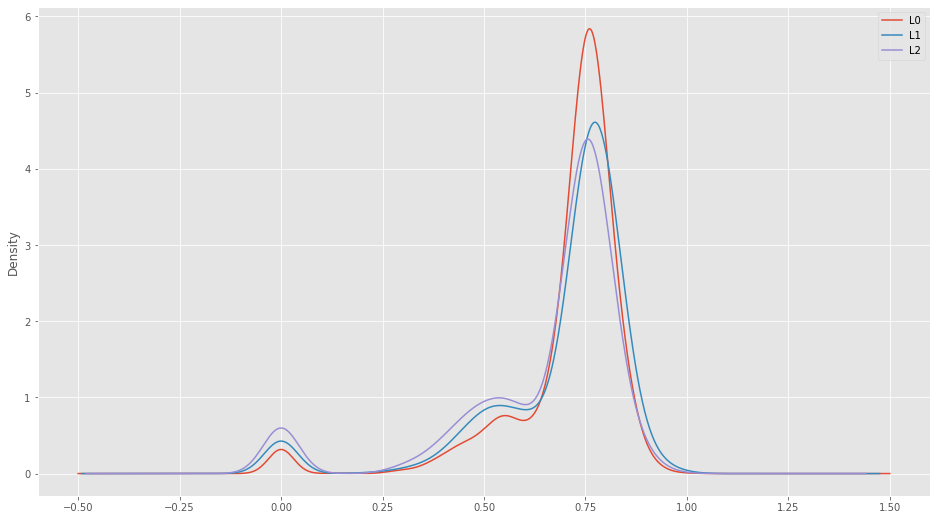

In [55]:
##another way to plot the same data, we are using density here

label_0_p =df[df['KPROTOTYPES'] == 0]
label_1_p =df[df['KPROTOTYPES'] == 1]    
label_2_p =df[df['KPROTOTYPES'] == 2]

x = pd.DataFrame(data={'L0':label_0_p['Wealth'], 'L1':label_1_p['Wealth'],'L2':label_2_p['Wealth']})

ax = x.plot.kde()

### Reduction of the number of variables usinf Factor Analysis

Documentation: https://www.datacamp.com/community/tutorials/introduction-factor-analysis
https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html

In [56]:
from sklearn.datasets import load_iris

In [57]:
#pip install factor_analyzer

In [58]:
from factor_analyzer import FactorAnalyzer

##### Adequacy Test
Before you perform factor analysis, we need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?"

2 methods:
- Bartlett’s Test: whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.



- Kaiser-Meyer-Olkin Test: KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate. 

        - Bartlett’s Test:

In [59]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

df_fa = df.drop( columns='KPROTOTYPES')
chi_square_value,p_value = calculate_bartlett_sphericity(df_fa)
chi_square_value, p_value

(17700.23171754518, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

        - Kaiser-Meyer-Olkin

In [60]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(df_fa)
kmo_model

/opt/anaconda3/lib/python3.7/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.6001018346768097

#### Choosing the Number of Factors

you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [61]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)

In [62]:

fa.fit(df_fa)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.37606366, 1.99077051, 1.61523813, 1.0622651 , 0.9758077 ,
       0.9051382 , 0.88277451, 0.85235199, 0.67594676, 0.63200259,
       0.46330507, 0.29752794, 0.27080784])

In [63]:
fa.loadings_

array([[-0.07676863,  0.02045911,  0.45450338],
       [ 0.06662599,  0.06322678,  0.80723195],
       [ 0.37084599, -0.30661512, -0.01271417],
       [ 0.33014196,  0.38356504, -0.01722398],
       [-0.21200448,  0.04467365, -0.07498425],
       [-0.24252499,  0.12534034,  0.09582063],
       [ 0.32605455, -0.21858743,  0.06089471],
       [ 0.47589211,  0.66476698, -0.08177959],
       [-0.71938889,  0.44413856,  0.20711898],
       [ 0.15661354, -0.14287836,  0.23009608],
       [-0.15923793,  0.04900256, -0.24672957],
       [ 0.60099465, -0.33719221,  0.14755161],
       [ 0.48435705,  0.68452849,  0.00601207]])

In [64]:
fa.get_communalities()

array([0.21288532, 0.66006007, 0.23170123, 0.25641252, 0.05256427,
       0.08371016, 0.1578002 , 0.67507634, 0.7576777 , 0.09788624,
       0.08863345, 0.49666463, 0.70321715])

Check eigenvalues

In [65]:
ev,v = fa.get_eigenvalues()

In [66]:
ev#eigenvalues

array([2.37606366, 1.99077051, 1.61523813, 1.0622651 , 0.9758077 ,
       0.9051382 , 0.88277451, 0.85235199, 0.67594676, 0.63200259,
       0.46330507, 0.29752794, 0.27080784])

Here, you can see only for 4-factors eigenvalues are greater than one. It means we need to choose only 4 factors (or unobserved variables).

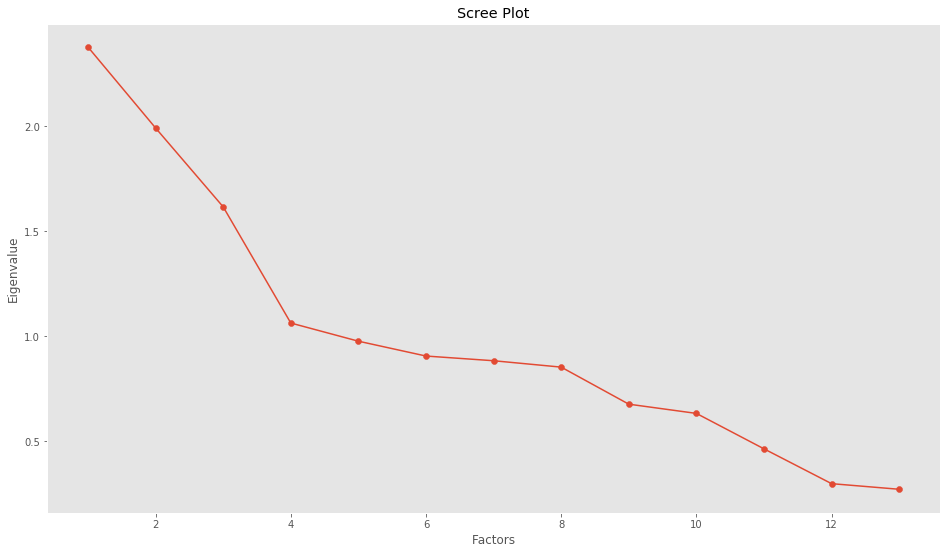

In [67]:
# Create scree plot using matplotlib
plt.scatter(range(1,df_fa.shape[1]+1),ev)
plt.plot(range(1,df_fa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#### Performing Factor Analysis

Factor Analysis can be done to reveal patterns among the inter-relationships of the items.
Docs :https://www.youtube.com/watch?v=rQZiy7GE-LM

- EFA : Exploratory Factor Analysis: 
    Three steps: 
            - Extraction
            - Rotation
            - Interpretation
            
            
          1st. number features == number items
          2nd decide number of factors that is the more appropiate -> eigenvalues + screeplot
          3rd Factor loadings: relation between item-factor ,
          how much variance accounted for by factor
          4 when we talk about the magnitude of a Factor-> eigenvalue
          
     1. start with eigenvalues >>=1
     2. technic that changes the perspective from which data are viewed
     3. Interpretation: that there are 4 hidden structures behind our 14 items, 


In [68]:
# Create factor analysis object and perform factor analysis
fa2 = FactorAnalyzer(4,rotation="varimax")
fa2.fit(df_fa)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [69]:
loadings = fa2.loadings_#each column is a factor, each row is a feature
loadings

array([[-0.0360361 ,  0.20067266,  0.4480288 ,  0.08341567],
       [ 0.04510744, -0.01928213,  0.84625983, -0.19465128],
       [-0.03393977, -0.20027016,  0.07259582,  0.79299047],
       [ 0.50102174, -0.06859807,  0.01097038,  0.00140763],
       [-0.07779093,  0.1609824 , -0.0970254 , -0.0865579 ],
       [-0.03650746,  0.22281661,  0.05762923, -0.15374554],
       [ 0.01364607, -0.18644741,  0.12339266,  0.4448718 ],
       [ 0.8305527 , -0.01950441, -0.03891751,  0.03553128],
       [-0.02660008,  0.85230784,  0.11441608, -0.2472326 ],
       [-0.0392801 , -0.13506909,  0.24155235,  0.10863967],
       [-0.0394266 ,  0.08812423, -0.25850708, -0.09513959],
       [ 0.02884527, -0.74540982,  0.23538461,  0.09552453],
       [ 0.82916241, -0.03979228,  0.04376645, -0.02551544]])

In [70]:
# Get variance of each factors
fa.get_factor_variance()

(array([1.85660326, 1.55530509, 1.06238094]),
 array([0.14281564, 0.11963885, 0.08172161]),
 array([0.14281564, 0.26245449, 0.3441761 ]))

In [71]:
# Get variance of each factors
fa2.get_factor_variance()#total 41% cumulative Variance explained by the 5 factors.

(array([1.6450435 , 1.50581821, 1.14733729, 0.99574056]),
 array([0.12654181, 0.11583217, 0.08825671, 0.07659543]),
 array([0.12654181, 0.24237398, 0.33063069, 0.40722612]))

In [133]:
l = df.columns[:13]

list = l
dictionary = {}
c = 0
for i in list:
    dictionary[i] = loadings[c]
    c +=1
     

new_t = pd.DataFrame(data = dictionary,index=['Factor 1', 'Factor 0','Factor 2','Factor 3'])
new_t


,Wealth,Income,nFam,Size_municipality,Investment_Risk_Propensity,Pension_Goal,Obiettivo_accumulo_figli,Demographic_WellBeing,Age,Fin_Education,Gender,Employment,Social_risk
Factor 1,-0.036036,0.045107,-0.033940,0.501022,-0.077791,-0.036507,0.013646,0.830553,-0.026600,-0.039280,-0.039427,0.028845,0.829162
Factor 0,0.200673,-0.019282,-0.200270,-0.068598,0.160982,0.222817,-0.186447,-0.019504,0.852308,-0.135069,0.088124,-0.745410,-0.039792
Factor 2,0.448029,0.846260,0.072596,0.010970,-0.097025,0.057629,0.123393,-0.038918,0.114416,0.241552,-0.258507,0.235385,0.043766
Factor 3,0.083416,-0.194651,0.792990,0.001408,-0.086558,-0.153746,0.444872,0.035531,-0.247233,0.108640,-0.095140,0.095525,-0.025515


In [174]:
F0=[]
F1=[]
F2=[]
F3=[]
for k in l:

    y = new_t[new_t[k]==new_t[k].max()].index
    z =  new_t[k].max()
    print(k,': ',y[0],'--->',z)
    
    if y[0] == 'Factor 0':
        F0.append(k)
        
    if y[0] == 'Factor 1':
        F1.append(k)
        
    if y[0] == 'Factor 2':
        F2.append(k)
        
    if y[0] == 'Factor 3':
        F3.append(k)
        
print('F0: ',str(F0))        
print('F1: ',str(F1))        
print('F2: ',str(F2))        
print('F3: ',str(F3))

Wealth :  Factor 2 ---> 0.44802880293263175
Income :  Factor 2 ---> 0.8462598277887045
nFam :  Factor 3 ---> 0.7929904669532636
Size_municipality :  Factor 1 ---> 0.5010217391374132
Investment_Risk_Propensity :  Factor 0 ---> 0.16098240032744426
Pension_Goal :  Factor 0 ---> 0.22281661080638412
Obiettivo_accumulo_figli :  Factor 3 ---> 0.44487179960617335
Demographic_WellBeing :  Factor 1 ---> 0.8305527008982354
Age :  Factor 0 ---> 0.8523078434554011
Fin_Education :  Factor 2 ---> 0.24155235117545146
Gender :  Factor 0 ---> 0.08812423202270452
Employment :  Factor 2 ---> 0.235384612459847
Social_risk :  Factor 1 ---> 0.8291624118197014
F0:  ['Investment_Risk_Propensity', 'Pension_Goal', 'Age', 'Gender']
F1:  ['Size_municipality', 'Demographic_WellBeing', 'Social_risk']
F2:  ['Wealth', 'Income', 'Fin_Education', 'Employment']
F3:  ['nFam', 'Obiettivo_accumulo_figli']


### k-medoids

 k-medoids attempts to minimize the sum of dissimilarities between objects labeled to be in a cluster and one of the objects designated as the representative of that cluster. These representatives are called medoids.
 In contrast to the k-means algorithm that the centroids are central, average positions that might not be data points in the set, k-medoids chooses medoids from the data points in the set.
 
 KMedoids can be more robust to noise and outliers than KMeans as it will choose one of the cluster members as the medoid while KMeans will move the center of the cluster towards the outlier which might in turn move other points away from the cluster centre
 
Documentation: https://scikit-learn-extra.readthedocs.io/en/latest/generated/sklearn_extra.cluster.KMedoids.html

In [183]:
#pip install scikit-learn-extra

In [245]:
from sklearn_extra.cluster import KMedoids

dfg = n_df.drop(columns = ['KMEANS_Labels'])
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(dfg)
labels_kmedoids = kmedoids.labels_



In [246]:
df_2 = dfg
df_2['kMEDOIDS'] = labels_kmedoids 

In [247]:
df_2
kmedoids.cluster_centers_



array([[0.75894053, 0.76420977, 0.2       , 0.5       , 0.66666667,
        0.29988549, 0.46987952, 0.75      , 0.06424629],
       [0.7235015 , 0.73625038, 0.1       , 0.75      , 1.        ,
        0.61551223, 0.55421687, 0.75      , 0.16524536],
       [0.72957998, 0.7186397 , 0.1       , 0.5       , 1.        ,
        0.3671097 , 0.65060241, 0.5       , 0.04637097]])

In [248]:
df_2


,Wealth,Income,nFam,Size_municipality,Investment_Risk_Propensity,Demographic_WellBeing,Age,Fin_Education,Social_risk,kMEDOIDS
ID,,,,,,,,,,
0,0.738527,0.736368,0.0,0.75,0.666667,0.390902,0.602410,1.00,0.018719,0
1,0.764100,0.722982,0.0,0.75,1.000000,0.357439,0.879518,1.00,0.050519,1
2,0.766442,0.751450,0.0,0.50,0.666667,0.462908,0.771084,0.50,0.060832,2
3,0.785476,0.722627,0.0,0.75,1.000000,0.276345,0.795181,0.50,0.014991,2
4,0.700905,0.696817,0.1,0.75,1.000000,0.390902,0.855422,0.75,0.018719,1
...,...,...,...,...,...,...,...,...,...,...
7211,0.418975,0.635711,0.2,0.75,1.000000,0.151797,0.385542,0.50,0.002093,2
7212,0.615110,0.743242,0.0,0.75,1.000000,0.328822,0.542169,1.00,0.075600,1
7213,0.000000,0.715335,0.1,0.00,1.000000,0.285458,0.445783,0.50,0.057891,2


In [249]:
df_2.groupby(['kMEDOIDS']).size()


kMEDOIDS
0    2691
1    2076
2    2449
dtype: int64

Text(0.5, 0.92, 'K Medoids Analysis')

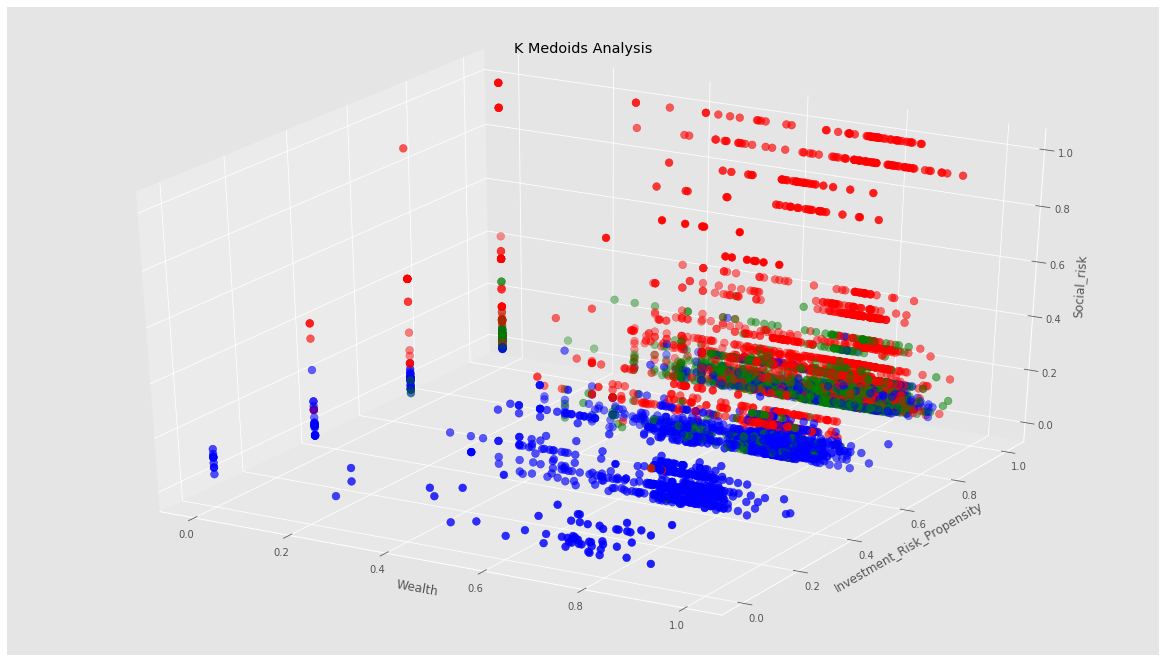

In [256]:
y = df_2["kMEDOIDS"]

X = np.array(df_2[['Wealth', 'Investment_Risk_Propensity', 'Social_risk']])#'Employment'
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','orange']
asignar=[]
for row in y:
  
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.set_xlabel('Wealth')
ax.set_ylabel('Investment_Risk_Propensity')
ax.set_zlabel('Social_risk')
ax.set_title('K Medoids Analysis')

In [260]:
DFF = dfg.drop(columns = ['kMEDOIDS'])
DFF

,Wealth,Income,nFam,Size_municipality,Investment_Risk_Propensity,Demographic_WellBeing,Age,Fin_Education,Social_risk
ID,,,,,,,,,
0,0.738527,0.736368,0.0,0.75,0.666667,0.390902,0.602410,1.00,0.018719
1,0.764100,0.722982,0.0,0.75,1.000000,0.357439,0.879518,1.00,0.050519
2,0.766442,0.751450,0.0,0.50,0.666667,0.462908,0.771084,0.50,0.060832
3,0.785476,0.722627,0.0,0.75,1.000000,0.276345,0.795181,0.50,0.014991
4,0.700905,0.696817,0.1,0.75,1.000000,0.390902,0.855422,0.75,0.018719
...,...,...,...,...,...,...,...,...,...
7211,0.418975,0.635711,0.2,0.75,1.000000,0.151797,0.385542,0.50,0.002093
7212,0.615110,0.743242,0.0,0.75,1.000000,0.328822,0.542169,1.00,0.075600
7213,0.000000,0.715335,0.1,0.00,1.000000,0.285458,0.445783,0.50,0.057891


([<matplotlib.axis.XTick at 0x13031a750>,
 <a list of 3 Text xticklabel objects>)

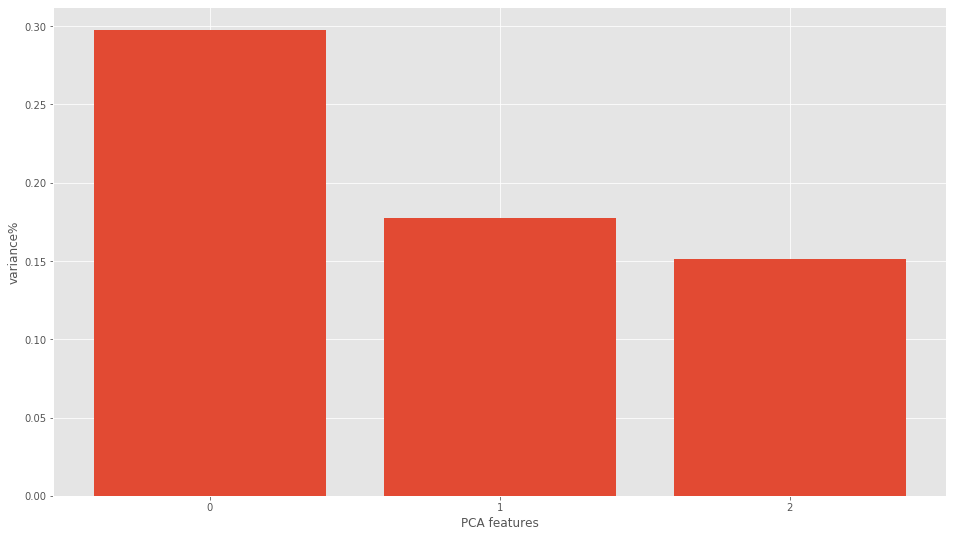

In [262]:
np.random.seed(42)



pca = PCA( n_components =3)
principalComponents = pca.fit_transform(DFF)
PCA_components = pd.DataFrame(principalComponents)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance%')
plt.xticks(features)

Text(0.5, 0.92, 'K Medoids Analysis with PCA dimensionality reduction')

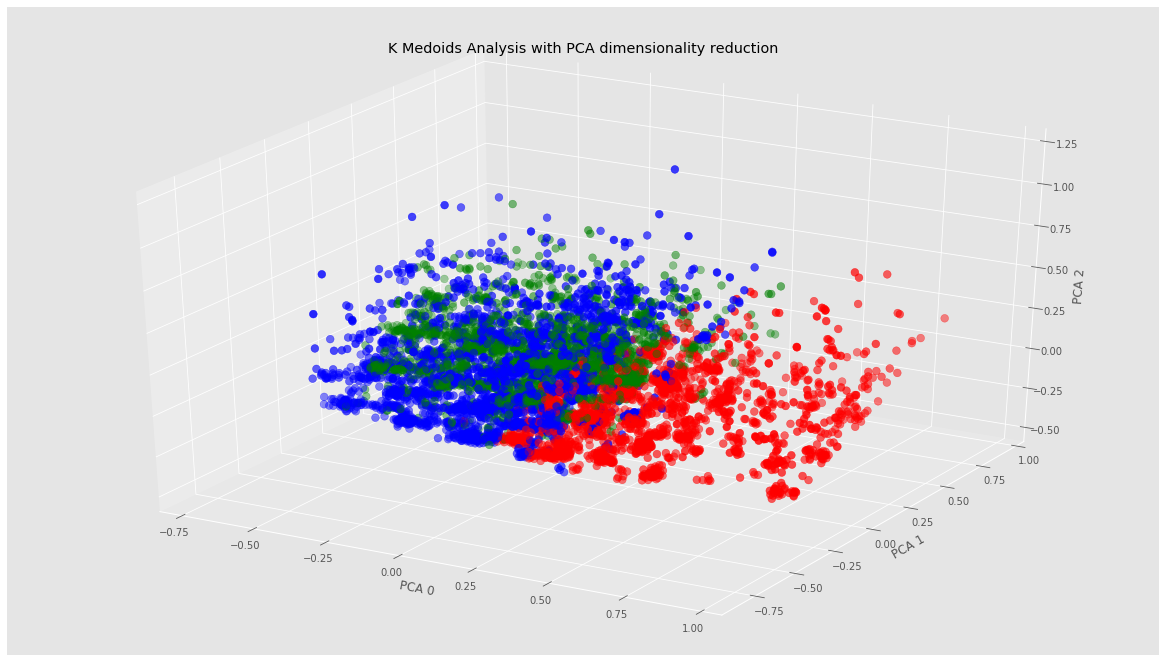

In [263]:



y = df_2["kMEDOIDS"]

X = np.array([PCA_components[0],PCA_components[1],PCA_components[2]])#'Employment'
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','orange']
asignar=[]
for row in y:
  
    asignar.append(colores[row])
ax.scatter(X[0], X[1], X[2], c=asignar,s=60)
ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 2')
ax.set_title('K Medoids Analysis with PCA dimensionality reduction')

Automatically created module for IPython interactive environment


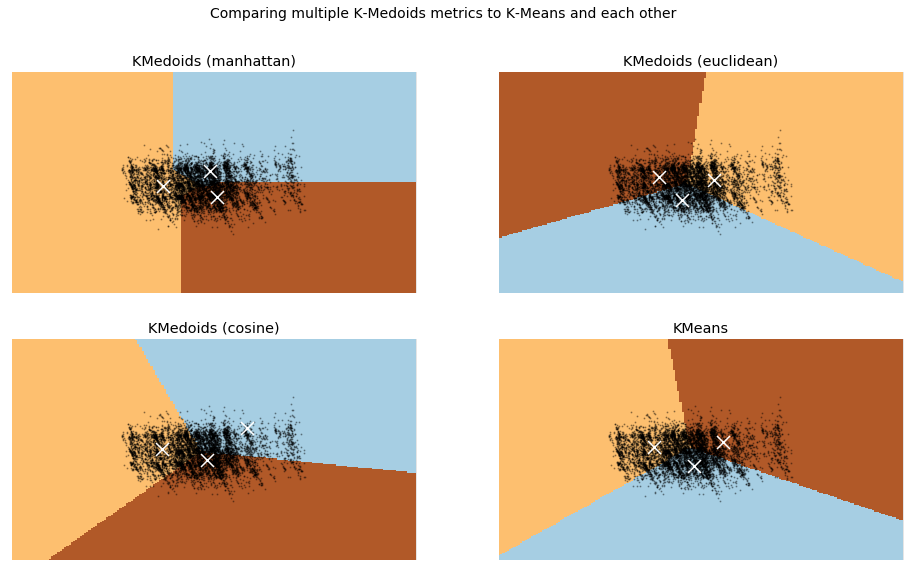

In [264]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

print(__doc__)

# Authors: Timo Erkkilä <timo.erkkila@gmail.com>
#          Antti Lehmussola <antti.lehmussola@gmail.com>
#          Kornel Kiełczewski <kornel.mail@gmail.com>
# License: BSD 3 clause

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)
n_digits = len(np.unique(digits.target))

reduced_data = PCA(n_components=2).fit_transform(DFF)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure()
plt.clf()

plt.suptitle(
    "Comparing multiple K-Medoids metrics to K-Means and each other",
    fontsize=14,
)


selected_models = [
    (
        KMedoids(metric="manhattan", n_clusters=3),
        "KMedoids (manhattan)",
    ),
    (
        KMedoids(metric="euclidean", n_clusters=3),
        "KMedoids (euclidean)",
    ),
    (KMedoids(metric="cosine", n_clusters=3), "KMedoids (cosine)"),
    (KMeans(n_clusters=3), "KMeans"),
]

plot_rows = int(np.ceil(len(selected_models) / 2.0))
plot_cols = 2

for i, (model, description) in enumerate(selected_models):

    # Obtain labels for each point in mesh. Use last trained model.
    model.fit(reduced_data)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.subplot(plot_cols, plot_rows, i + 1)
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    plt.plot(
        reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2, alpha=0.3
    )
    # Plot the centroids as a white X
    centroids = model.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(description)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

plt.show()